# Project

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading the data
file_path="../content/insurance.csv"
insurance_data = pd.read_csv(file_path)

In [ ]:
insurance_data.shape

(1338, 7)

In [ ]:
# separating our test data and keeping it aside

X_test_full = insurance_data.iloc[1000:,:].copy()
y_test_full = X_test_full['charges']
X_test_full.drop(['charges'],axis=1,inplace=True)

# we will only be using the df dataframe for our analysis

df = insurance_data.iloc[:1000,:].copy()

In [ ]:
# learning about the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1000, 7)

In [ ]:
df.info()
# we can see that the columns sex, smoker,region are to be encoded as they are of object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [ ]:
# checking if any of the entires have null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,39.615000,30.86338,1.080000,13075.755883
std,14.153908,6.04744,1.198765,11985.924552
min,18.000000,15.96000,0.000000,1121.873900
25%,27.000000,26.60000,0.000000,4719.683425
50%,40.000000,30.59000,1.000000,9283.021300
75%,52.000000,35.11250,2.000000,15882.795438
max,64.000000,50.38000,5.000000,63770.428010


In [ ]:
# Using EDA, we will see how the charges are distributed with different features

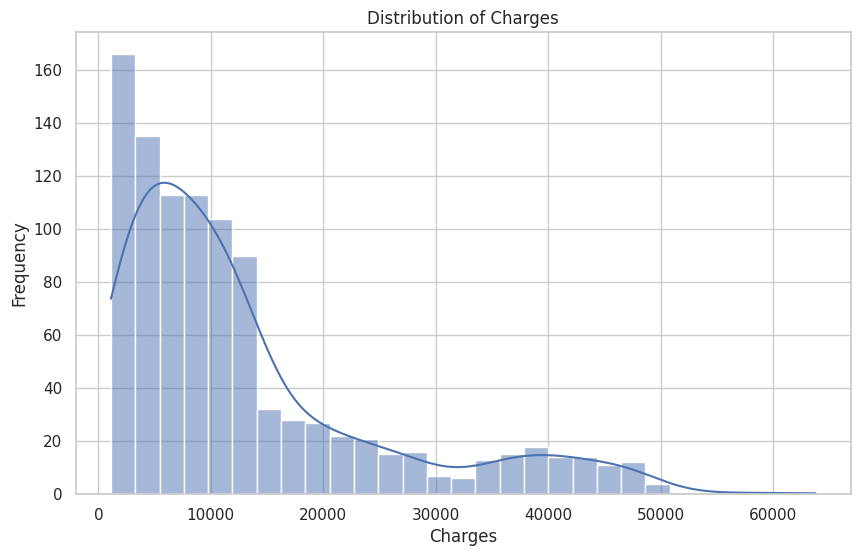

In [ ]:
# Distribution of Charges
sns.set(style='whitegrid')
f,ax = plt.subplots(1,1,figsize=(10,6))
plt.title("Distribution of Charges")
ax.set_xlabel("Charges")
ax.set_ylabel("Frequency")
ax = sns.histplot(df["charges"],kde=True)
plt.show()

In [ ]:
# we can see that the distribution is skewed to the right. we can apply log to make it more centered
# im not sure about this step

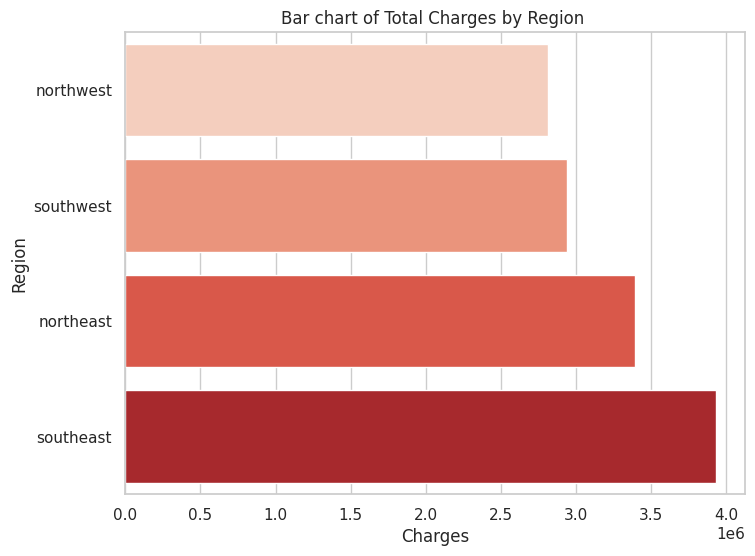

In [ ]:
# distribution of total charges by region
charges_by_region = df["charges"].groupby(df["region"]).sum().sort_values(ascending=True)


f , ax = plt.subplots(1,1,figsize=(8,6))
plt.title("Bar chart of Total Charges by Region ")
ax = sns.barplot(x=charges_by_region,y=charges_by_region.index,palette='Reds')
ax.set_xlabel("Charges")
ax.set_ylabel("Region")
plt.show()

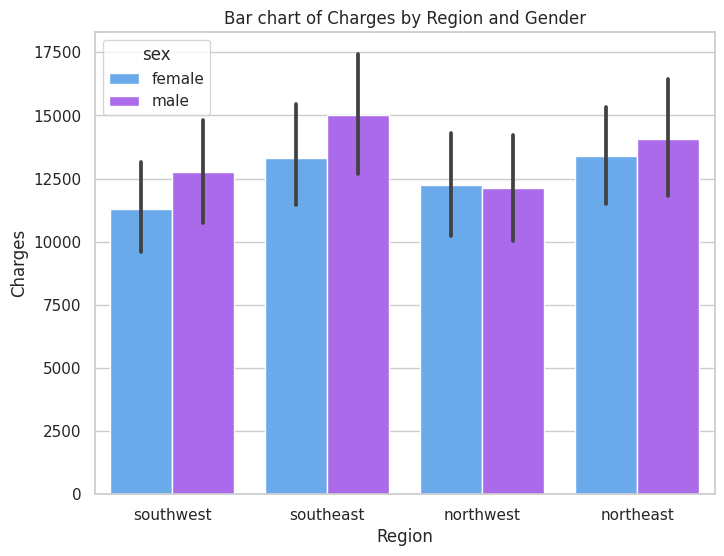

In [ ]:
f , ax = plt.subplots(1,1,figsize=(8,6))
plt.title("Bar chart of Charges by Region and Gender")
ax = sns.barplot(x="region",y="charges",hue="sex", data=df,palette="cool")
ax.set_xlabel("Region")
ax.set_ylabel("Charges")
plt.show()

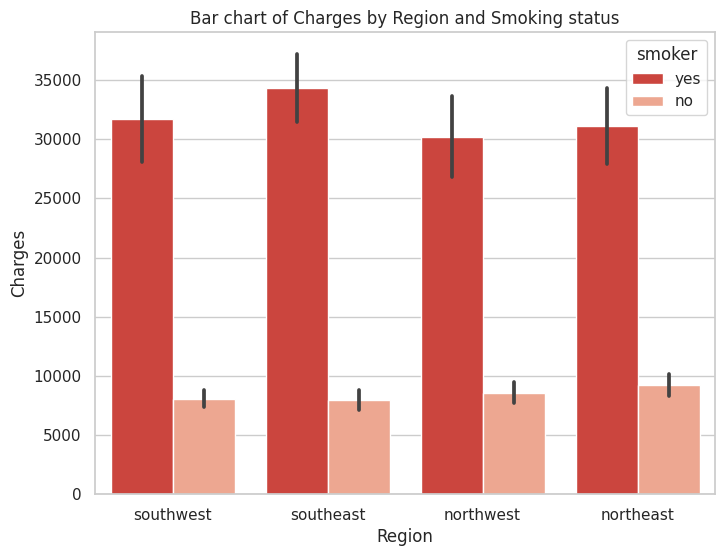

In [ ]:
f , ax = plt.subplots(1,1,figsize=(8,6))
plt.title("Bar chart of Charges by Region and Smoking status")
ax = sns.barplot(x="region",y="charges",hue="smoker", data=df,palette="Reds_r")
ax.set_xlabel("Region")
ax.set_ylabel("Charges")
plt.show()

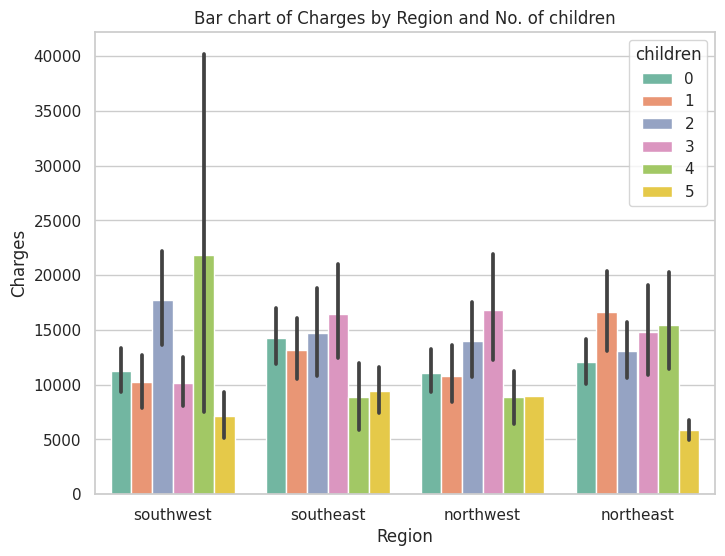

In [ ]:
f , ax = plt.subplots(1,1,figsize=(8,6))
plt.title("Bar chart of Charges by Region and No. of children")
ax = sns.barplot(x="region",y="charges",hue="children", data=df,palette="Set2")
ax.set_xlabel("Region")
ax.set_ylabel("Charges")
plt.show()

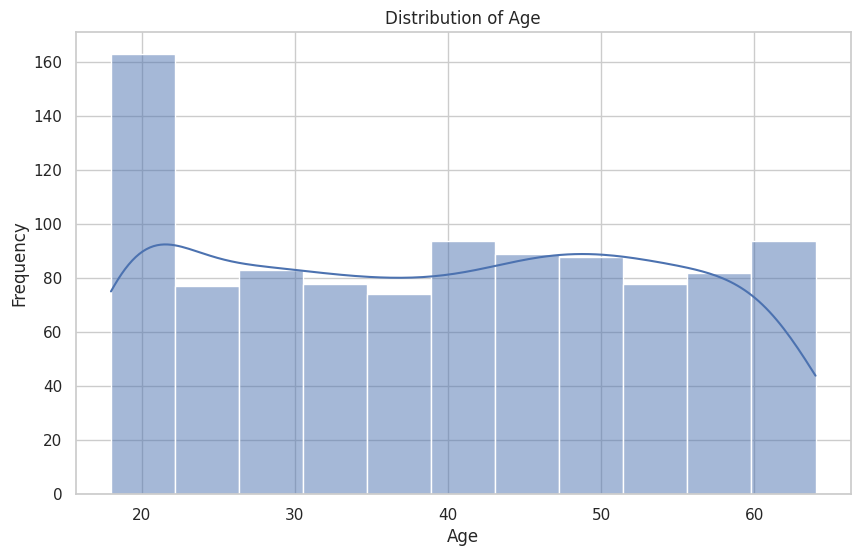

In [ ]:
f,ax = plt.subplots(1,1,figsize=(10,6))
ax = sns.histplot(df["age"],kde=True)
plt.title("Distribution of Age")
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
plt.show()

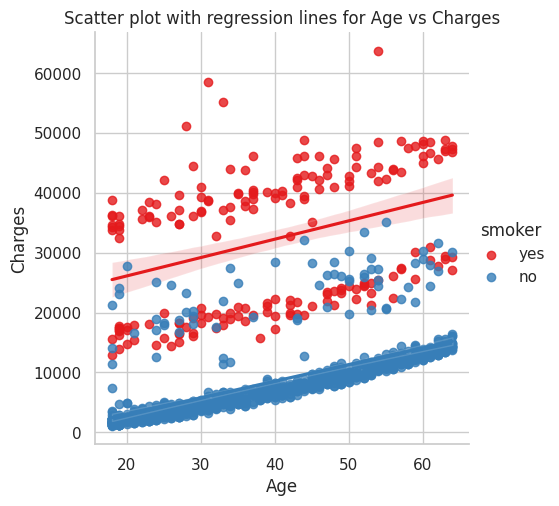

In [ ]:
# Scatter plot with regression lines for Age vs Charges
ax = sns.lmplot(x="age",y="charges",data=df,hue="smoker",palette="Set1")
plt.title("Scatter plot with regression lines for Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


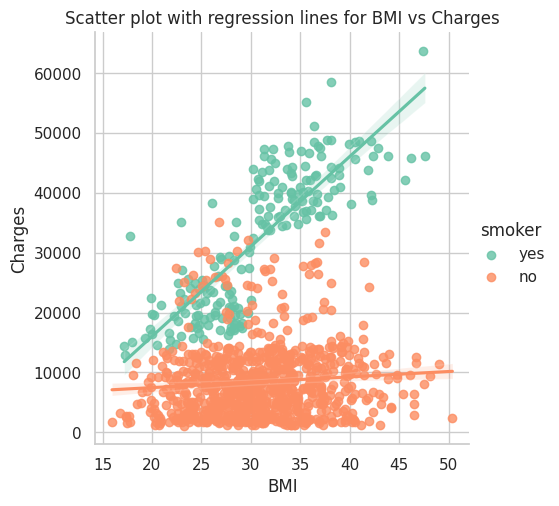

In [ ]:
# Scatter plot with regression lines for BMI vs Charges
ax = sns.lmplot(x="bmi",y="charges",data=df,hue="smoker",palette="Set2")
plt.title("Scatter plot with regression lines for BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


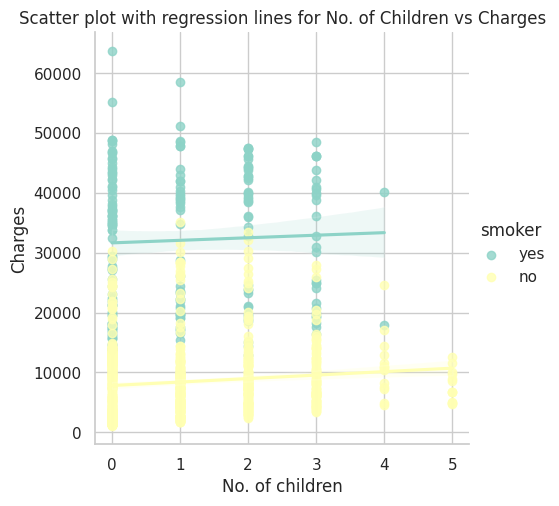

In [ ]:
# Scatter plot with regression lines for No. of Children vs Charges
ax = sns.lmplot(x="children",y="charges",data=df,hue="smoker",palette="Set3")
plt.title("Scatter plot with regression lines for No. of Children vs Charges")
plt.xlabel("No. of children")
plt.ylabel("Charges")
plt.show()


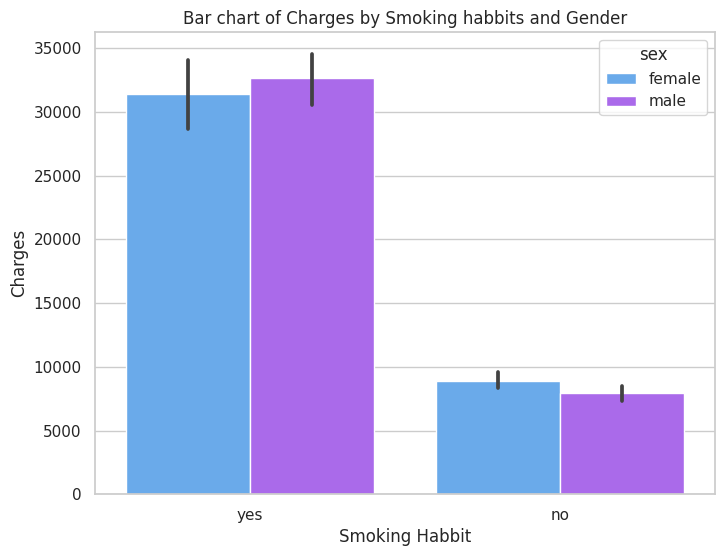

In [ ]:
f , ax = plt.subplots(1,1,figsize=(8,6))
plt.title("Bar chart of Charges by Smoking habbits and Gender")
ax = sns.barplot(x="smoker",y="charges",hue="sex", data=df,palette="cool")
ax.set_xlabel("Smoking Habbit")
ax.set_ylabel("Charges")
plt.show()

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

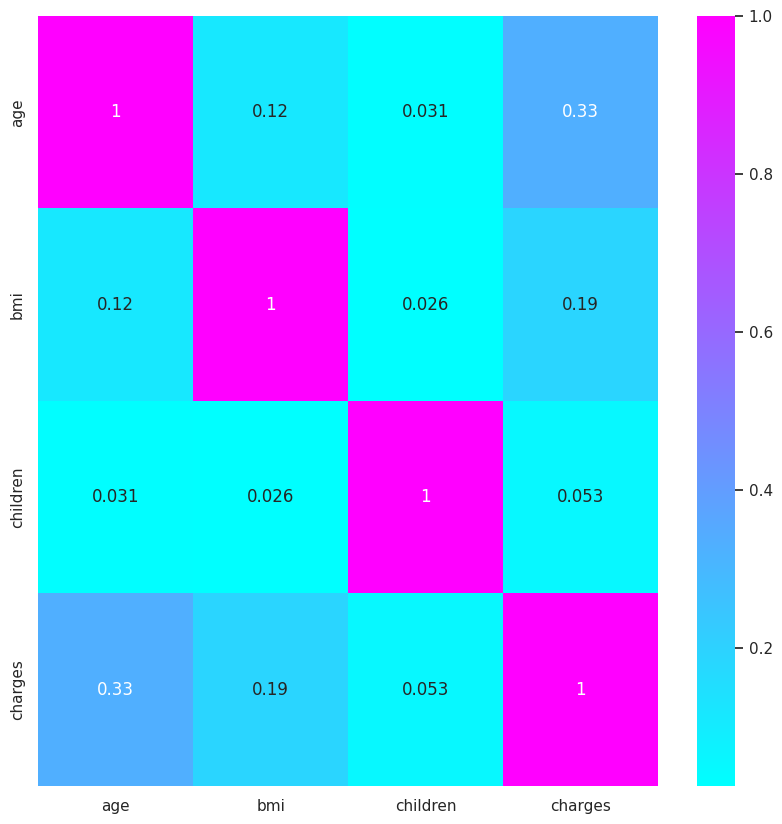

In [ ]:
f, ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.heatmap(df[['age','bmi','children','charges']].corr(),annot=True,cmap='cool')

In [ ]:
X = df.copy()
y = X.charges
X.drop(['charges'],axis=1,inplace=True)

In [ ]:
# Preprocessing

preprocessor = ColumnTransformer(transformers=[("onehot",OneHotEncoder(sparse=False,drop='first'),['sex','smoker','region'])],remainder="passthrough")


In [ ]:
def model_cv_score(model):
  my_pipeline = Pipeline([("preprocessor",preprocessor),
                        ("model",model)])
  cv_scores_mae = -1*cross_val_score(my_pipeline,X,y,cv=5,scoring="neg_mean_absolute_error")
  cv_scores_r2 = cross_val_score(my_pipeline,X,y,cv=5,scoring="r2")
  return cv_scores_mae.mean(),cv_scores_r2.mean()

In [ ]:
# with Linear Regression
model_lr = LinearRegression()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
pipeline_lr = Pipeline([("preprocessor",preprocessor),
                        ("model",model_lr)])
pipeline_lr.fit(X_train,y_train)


valid_mae,r2_valid = model_cv_score(model_lr)
print("Linear Regression\n")
print("Cross Validation MAE Score: ", valid_mae)
print("Cross Validation Score r2: ",r2_valid)
test_mae = mean_absolute_error(y_test_full, pipeline_lr.predict(X_test_full))
print("Test Score: ", test_mae)
test_mape = mean_absolute_percentage_error(y_test_full, pipeline_lr.predict(X_test_full))
print("Test MAPE score : ",test_mape)
r2_test = metrics.r2_score(y_test_full, pipeline_lr.predict(X_test_full))
print("Test Score r2: ",r2_test)

Linear Regression

Cross Validation MAE Score:  4088.5303084881643
Cross Validation Score r2:  0.7514781464009228
Test Score:  4434.152721527582
Test MAPE score :  0.408803732345518
Test Score r2:  0.7318483932983832


In [ ]:
# with Decision Tree Regression
model_dt = DecisionTreeRegressor(min_samples_split=5,max_depth=5,random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
pipeline_dt = Pipeline([("preprocessor",preprocessor),
                        ("model",model_dt)])
pipeline_dt.fit(X_train,y_train)

valid_mae,r2_valid = model_cv_score(model_dt)
print("Decision Tree Regression\n")
print("Cross Validation MAE Score: ", valid_mae)
print("Cross Validation Score r2: ",r2_valid)
test_mae = mean_absolute_error(y_test_full, pipeline_dt.predict(X_test_full))
print("Test Score: ", test_mae)
test_mape = mean_absolute_percentage_error(y_test_full, pipeline_dt.predict(X_test_full))
print("Test MAPE score : ",test_mape)
r2_test = metrics.r2_score(y_test_full, pipeline_dt.predict(X_test_full))
print("Test Score r2: ",r2_test)

Decision Tree Regression

Cross Validation MAE Score:  2636.044774370991
Cross Validation Score r2:  0.8401067747899236
Test Score:  2904.0793493768
Test MAPE score :  0.2985467308352175
Test Score r2:  0.8386251168347038


In [ ]:
# random forest

model_rf = RandomForestRegressor(n_estimators=150, min_samples_split=5,random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
pipeline_rf = Pipeline([("preprocessor",preprocessor),
                        ("model",model_rf)])

pipeline_rf.fit(X_train,y_train)


valid_mae,r2_valid = model_cv_score(model_rf)
print("Random Forest Regression\n")
print("Cross Validation MAE Score: ", valid_mae)
print("Cross Validation Score r2: ",r2_valid)
test_mae = mean_absolute_error(y_test_full, pipeline_rf.predict(X_test_full))
print("Test Score: ", test_mae)
test_mape = mean_absolute_percentage_error(y_test_full, pipeline_rf.predict(X_test_full))
print("Test MAPE score : ",test_mape)
r2_test = metrics.r2_score(y_test_full, pipeline_rf.predict(X_test_full))
print("Test Score r2: ",r2_test)

Random Forest Regression

Cross Validation MAE Score:  2649.1532383850385
Cross Validation Score r2:  0.8439468500180963
Test Score:  2897.8356125840082
Test MAPE score :  0.31978549090144065
Test Score r2:  0.8355791674452584


In [ ]:
# with XGBoost
model_xgb = XGBRegressor(learning_rate = 0.008, n_estimators  = 375, max_depth = 4,random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
pipeline_xgb = Pipeline([("preprocessor",preprocessor),
                        ("model",model_xgb)])
pipeline_xgb.fit(X_train,y_train)


valid_mae,r2_valid = model_cv_score(model_xgb)
print("XGBoost Regression\n")
print("Cross Validation MAE Score: ", valid_mae)
#print("Cross Validation MAPE Score: ", valid_mape)
print("Cross Validation Score r2: ",r2_valid)
test_mae = mean_absolute_error(y_test_full, pipeline_xgb.predict(X_test_full))
print("Test Score: ", test_mae)
test_mape = mean_absolute_percentage_error(y_test_full, pipeline_xgb.predict(X_test_full))
print("Test MAPE score : ",test_mape)
r2_test = metrics.r2_score(y_test_full, pipeline_xgb.predict(X_test_full))
print("Test Score r2: ",r2_test)

XGBoost Regression

Cross Validation MAE Score:  2260.1218139286875
Cross Validation Score r2:  0.8570206742551146
Test Score:  2536.3179801215792
Test MAPE score :  0.24159614462183868
Test Score r2:  0.8421731296652453


In [ ]:
# the best model is XGBoost
# with r2 test score =  0.8503728762307685

In [ ]:
#for i in range(len(models)):
#  mae = mae_score(models[i])


 # print("Model %d MAE: %d" %(i+1,mae))

In [ ]:
#model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
#model_2 = RandomForestRegressor(n_estimators=75, random_state=0) # dummy
#model_3 = RandomForestRegressor(n_estimators=100, random_state=0)
#model_4 = RandomForestRegressor(n_estimators=125, random_state=0)
#model_5 = RandomForestRegressor(n_estimators=150, random_state=0)
#model_6 = RandomForestRegressor(n_estimators=200, random_state=0)
#model_7 = RandomForestRegressor(n_estimators=50, criterion='absolute_error', random_state=0)
#model_8 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
#model_9 = RandomForestRegressor(n_estimators=150, criterion='absolute_error', random_state=0)


#model_1 = RandomForestRegressor(n_estimators=100,criterion='absolute_error', max_depth=5, min_samples_split=10,random_state=0)
#model_2 = RandomForestRegressor(n_estimators=150,criterion='absolute_error', max_depth=5, min_samples_split=10,random_state=0)
#model_3 = RandomForestRegressor(n_estimators=100,criterion='absolute_error', max_depth=5, min_samples_split=15,random_state=0)
#model_4 = RandomForestRegressor(n_estimators=50,criterion='absolute_error',max_depth=5, min_samples_split=10, random_state=0)
#model_5 = RandomForestRegressor(n_estimators=150,criterion='absolute_error', max_depth=5, min_samples_split=15,random_state=0)
#model_6 = RandomForestRegressor(n_estimators=50,criterion='absolute_error',max_depth=5, min_samples_split=15, random_state=0)
#model_7 = RandomForestRegressor(n_estimators=100,criterion='absolute_error', max_depth=5, min_samples_split=20,random_state=0)
#model_8 = RandomForestRegressor(n_estimators=150,criterion='absolute_error', max_depth=5, min_samples_split=20,random_state=0)
#model_9 = RandomForestRegressor(n_estimators=50,criterion='absolute_error',max_depth=5, min_samples_split=20, random_state=0)
#model_10 = RandomForestRegressor(n_estimators=100,criterion='absolute_error',max_depth=7, min_samples_split=20, random_state=0)
#model_11 = RandomForestRegressor(n_estimators=150,criterion='absolute_error', max_depth=7, min_samples_split=20,random_state=0)
#model_12 = RandomForestRegressor(n_estimators=150, min_samples_split=5,random_state=0)


In [ ]:
'''
import xgboost as xgb
model_1=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 100, max_depth = 3)
model_2=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 200, max_depth = 3)
model_3=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 300, max_depth = 3)
model_4=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 400, max_depth = 3)
model_5=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 500, max_depth = 3)
model_6=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 100, max_depth = 4)
model_7=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 200, max_depth = 4)
model_8=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 300, max_depth = 4)
model_9=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 400, max_depth = 4)
model_10=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 500, max_depth = 4)
model_11=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 100, max_depth = 5)
model_12=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 200, max_depth = 5)
model_13=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 300, max_depth = 5)
model_14=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 400, max_depth = 5)
model_15=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 500, max_depth = 5)
'''


'\nimport xgboost as xgb\nmodel_1=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 100, max_depth = 3)\nmodel_2=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 200, max_depth = 3)\nmodel_3=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 300, max_depth = 3)\nmodel_4=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 400, max_depth = 3)\nmodel_5=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 500, max_depth = 3)\nmodel_6=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 100, max_depth = 4)\nmodel_7=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 200, max_depth = 4)\nmodel_8=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 300, max_depth = 4)\nmodel_9=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 400, max_depth = 4)\nmodel_10=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 500, max_depth = 4)\nmodel_11=xgb.XGBRegressor(learning_rate = 0.01, n_estimators  = 100, max_depth = 5)\nmodel_12=xgb.XGBRegressor(learning_rate = 0.01, 

In [ ]:





# 140,9
# 100,7




#model_6
 #
#models = [model_1, model_2, model_3, model_4, model_5,model_6, model_7, model_8, model_9, model_10,model_11, model_12, model_13,model_14, model_15]

